In [36]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from statsmodels.compat import lzip
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
%run ../pyfiles/data_cleaning
%run ../pyfiles/regression

## Data Preprocessing

In [22]:
df = pd.read_csv('../data/data.tsv', sep = '\t')
df = clean_orig_dataset(df)
X = df.drop('AVGDV', axis = 1)
y = df['AVGDV']

In [4]:
# scale dataframe
scaled_df = scale_dataset(X)

### Cook's Distance

In [13]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

C:\Users\allis\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


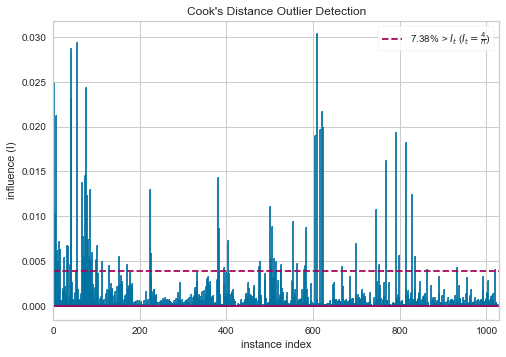

In [14]:
# Load the regression dataset
X, y = load_concrete()

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

### Recursive Feature Elimination

In [6]:
rfe_df = recursive_feature_elimination(scaled_df, X, y)
rfe_df.drop('AVGADW0001', axis = 1, inplace = True)

In [10]:
rfe_df.corr()

,POP2004,WHITE,BLACK,ONPREM_BG,AVGMPDDIS
POP2004,1.000000,0.492743,0.512490,0.054354,0.359581
WHITE,0.492743,1.000000,-0.451859,0.227941,-0.088067
BLACK,0.512490,-0.451859,1.000000,-0.206279,0.381327
ONPREM_BG,0.054354,0.227941,-0.206279,1.000000,0.584357
AVGMPDDIS,0.359581,-0.088067,0.381327,0.584357,1.000000


In [32]:
rfe_res = run_model(rfe_df, y)

                                 OLS Regression Results                                
Dep. Variable:                  AVGDV   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              530.2
Date:                Wed, 04 Dec 2019   Prob (F-statistic):                   2.32e-180
Time:                        11:13:23   Log-Likelihood:                         -1738.1
No. Observations:                 431   AIC:                                      3486.
Df Residuals:                     426   BIC:                                      3507.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
clf = lasso_for_predict(lasso_df, y)

In [22]:
print(mean_squared_error(y, clf.predict(lasso_df)))
print(r2_score(y, clf.predict(lasso_df)))

175.99005763559745
0.7625012777076338


### Visualizations: EDA

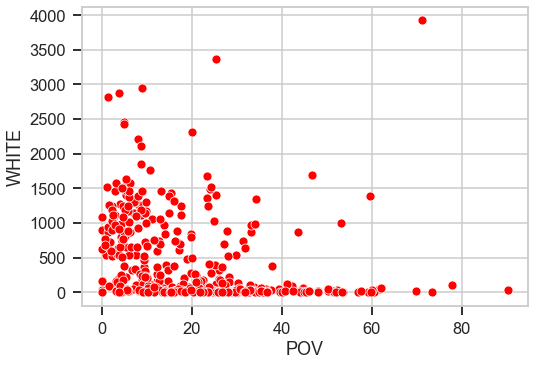

In [31]:
sns.scatterplot(X['POV'], X['WHITE'], color = 'red')
sns.set_context('talk')

In [34]:
fig = sm.graphics.influence_plot(rfe_res, criterion="cooks")

AttributeError: 'NoneType' object has no attribute 'get_influence'

In [ ]:
df.loc[()]